# Onderzoeksvragen en eerste verkenning: FIFA 19

<b> Redouan el Hidraoui <br>
Maurits Arissen <br>
Eric Houdijk <br>
V2A </b>

Lever één Jupyter Notebook in met de volgende onderdelen:
* een eerste verkenning en analyse van je dataset (stappen 1 tot en met 4 uit het data science proces);
* drie concept-onderzoeksvragen;
* een externe dataset (als bijlage in csv-formaat).

## Data collection

*Data collection is al voor je gedaan, aangezien je een dataset krijgt toegewezen, 
waarbij de ruwe data al eerder is verzameld door derden.
Je moet nog wel op zoek naar een externe dataset om je data mee uit te breiden. 
Deze data is echter ook al eerder voor je verzameld: je hoeft zelf geen dataverzameling te doen door bijvoorbeeld interviews te houden of sensoren uit te lezen.*
Na deze stap is er sprake van <b>ruwe data</b>.

In [168]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Onze gekozen CSV-file dataset inladen: <br>
- fifa19.csv

De dataset bevat: <br>
1. Alle spelers uit FIFA 19.
2. Speelpositie en fysieke eigenschappen.
3. Persoonlijke spelersinformatie (bijv. nationaliteit, club, leeftijd, salaris etc.).

In [169]:
fifa_source = pd.read_csv('source/fifa19.csv', index_col=0)

De grootte van onze dataset:
- 8.71 MB
- Bevat 18207 rijen (dus 18206 spelers, want de eerste rij bevat alle kolommen)

In [170]:
rows_dataset = fifa_source.shape[0] - 1
rows_dataset

18206

Een aantal rijen als voorbeeld voor hoe de dataset eruit ziet:

In [171]:
fifa_source.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


## Data processing

*Na het verzamelen van de data, moet je dit waarschijnlijk eerst bewerken, 
want het komt niet altijd in het formaat binnen dat je voor ogen had. 
Deze stap data processing is ook al grotendeels voor je gedaan: je krijgt de data immers in nette tabelvorm aangeleverd (bijvoorbeeld in CSV-files). 
Het is wel goed mogelijk dat je de data moet omvormen om meerdere datasets te kunnen combineren. 
Na deze stap heb je <b>geordende data</b>.*

De column <b>'Release Clause'</b> bevat characters zoals €, M en K. Om later gebruik te maken van deze data,
willen wij graag van deze characters af.

In [172]:
fifa_source['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

Na het verwijderen van de ongewenste characters:

In [192]:
fifa_source['Release Clause'].replace(regex=True,inplace=True,to_replace=r'M',value=r'')
fifa_source['Release Clause'].replace(regex=True,inplace=True,to_replace=r'K',value=r'')
fifa_source['Release Clause'].replace(regex=True,inplace=True,to_replace=r'€',value=r'')

fifa_source['Release Clause']

0        226.5
1        127.1
2        228.1
3        138.6
4        196.4
         ...  
18202      143
18203      113
18204      165
18205      143
18206      165
Name: Release Clause, Length: 18207, dtype: object

## Data cleaning

*Je hebt nu een geordende dataset, maar deze is niet noodzakelijk al helemaal schoon. 
In de stap data cleaning ga je op zoek naar dubbele en missende waarden, outliers en andere onvolkomenheden en los je deze op. 
Na deze stap heb je <b>schone data</b>.*

Op dit moment bevat onze gekozen dataset <b>88 kolommen</b>:

In [174]:
print('Aantal kolommen in fifa19.csv: {}'.format(len(fifa_source.columns)))
fifa_source.columns

Aantal kolommen in fifa19.csv: 88


Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Wij als team zijn tot de conclusie gekomen dat de volgende kolommen overbodig, en dus niet nodig zijn:
1. <b>Photo</b>, omdat: deze kolom een referentie bevat naar een afbeelding van de desbetreffende speler. Dit is nog relevant voor ons onderzoek nog hebben wij de beschikking tot deze foto's.
2. <b>Flag</b>, omdat: deze kolom een referentie bevat naar een afbeelding van de vlag die bij de nationaliteit hoort van de desbetreffende speler. Dit is nog relevant voor ons onderzoek, de 'Nationality' kolom is bruikbaarder, nog hebben wij beschikking tot deze afbeeldingen.
3. <b>Club logo</b>, omdat: bevat url's naar afbeeldingen
4. <b>Special</b>, omdat: nummers zonder duidelijke betekenis
5. <b>Body Type</b>, omdat: niet al te nuttig, erg generiek, bijna alle spelers delen dezelfde 3 bodytypes
6. <b>International Reputation</b>, omdat: weinig zeggend nummer
7. <b>Skill Moves</b>, omdat: weinig zeggend nummer
8. <b>Real Face</b>, omdat: Yes / No kolom, geen nuttige data
9. <b>Jersey Number</b>, omdat: weinig zeggend nummer, heeft geen specifiek betekenis

In [175]:
fifa_source.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'Body Type', 'International Reputation', 'Skill Moves', 'Real Face', 'Jersey Number'], axis=1, inplace=True)

De resterende kolommen na het verwijderen van de overbodige kolommen:

In [176]:
print('Aantal kolommen in fifa19.csv na het verwijderen van overbodige kolommen: {}'.format(len(fifa_source.columns)))
fifa_source.columns

Aantal kolommen in fifa19.csv na het verwijderen van overbodige kolommen: 79


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Work Rate', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

De column <b>'Overall'</b> bevat een getal (rating) van een speler. dit geeft weer hoe goed een speler
is t.o.v. de andere spelers binnen de dataset. Wij vinden dan ook dat deze column <b>niet</b> NaN mag zijn,
het heeft een belangrijke betekenis.
* Alle spelers die hier <b>NaN</b> hebben staan, worden uit onze dataset gehaald.

In [177]:
aantal_nan_overall = pd.isnull(fifa_source['Overall']).sum().sum()
print('Aantal NaN-waardes column \'Overall\': {}'.format(aantal_nan_overall))

Aantal NaN-waardes column 'Overall': 0


De resterende columns met NaN worden door ons gevult met het getal 0. 
Dit doen wij om later (mochten die ontstaan door dit) foutmeldingen te voorkomen.

In [178]:
aantal_nan = pd.isnull(fifa_source).sum().sum()
print('Huidige aantal NaN-waardes: {}'.format(aantal_nan))

Huidige aantal NaN-waardes: 76732


In [179]:
fifa_source.fillna(0, inplace=True)

In [180]:
aantal_nan = pd.isnull(fifa_source).sum().sum()
print('Aantal NaN-waardes na het replacen met getal 0: {}'.format(aantal_nan))

Aantal NaN-waardes na het replacen met getal 0: 0


Onze dataset bevat geen spelers met NaN waardes in  column <b>'Overall'</b>.

Aantal duplicate spelers binnen onze fifa19.csv dataset:
* <b>0 spelers</b>

Dit checken wij aan de hand van het unieke ID die iedere speler toegewezen heeft gekregen.

In [181]:
duplicatePlayers = fifa_source[fifa_source.duplicated(['ID'])]
print("Duplicate players gebaseerd op het unieke ID:", duplicatePlayers.count().sum())

Duplicate players gebaseerd op het unieke ID: 0


## Data exploration & analysis

*Voordat je kan beginnen met het beantwoorden van de onderzoeksvragen, 
moet je de dataset eerst doorgronden en analyseren. 
Je moet begrijpen waar je data uit bestaat en hoe je met je data de onderzoeksvragen oplost. 
Gebruik <b>statistische analyses en visualisaties</b> om inzicht te krijgen in de dataset.* 

<b>Statische analyse column 'Overall'</b>:

In [182]:
np.round(fifa_source['Overall'].describe(), decimals=2)

count    18207.00
mean        66.24
std          6.91
min         46.00
25%         62.00
50%         66.00
75%         71.00
max         94.00
Name: Overall, dtype: float64

<b>Statische analyse column 'Age'</b>:

In [183]:
np.round(fifa_source['Age'].describe(), decimals=0)

count    18207.0
mean        25.0
std          5.0
min         16.0
25%         21.0
50%         25.0
75%         28.0
max         45.0
Name: Age, dtype: float64

<b>Statische analyse column 'Release Clause'</b>:

In [184]:
np.round(fifa_source['Release Clause'].describe(), decimals=2)

count     18207
unique     1245
top           0
freq       1564
Name: Release Clause, dtype: int64

<b>Histogram met Aantal spelers per 'Overall' waarde</b>:

(array([ 192.,  998., 2363., 4727., 4289., 3570., 1513.,  445.,   96.,
          14.]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <a list of 10 Patch objects>)

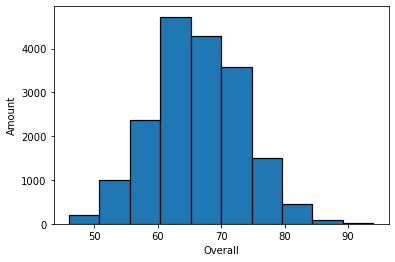

In [185]:
histogram = plt.hist(fifa_source['Overall'], edgecolor='black', linewidth=1.2)
plt.xlabel('Overall')
plt.ylabel('Amount')
histogram

<b>Boxplot met column 'Overall'</b>:

{'whiskers': [<matplotlib.lines.Line2D at 0x2abbe880>,
 'caps': [<matplotlib.lines.Line2D at 0x2abbe568>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acc28e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2abbed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acc2718>],
 'means': []}

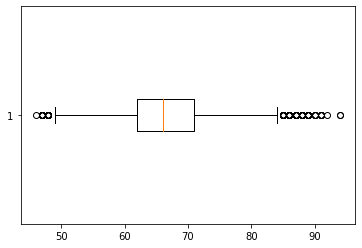

In [186]:
boxplot = plt.boxplot(fifa_source['Overall'], vert=False)
boxplot

<b>Scatter plot met column 'Overall' t.o.v. column 'Age'</b>:

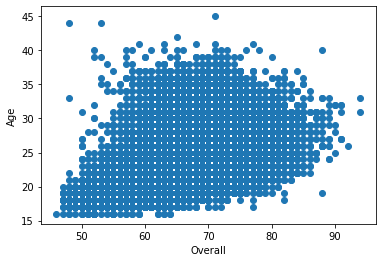

In [187]:
scatter = plt.scatter(fifa_source['Overall'], fifa_source['Age'])
plt.xlabel('Overall')
plt.ylabel('Age')
scatter

<b>Verplichte onderzoeksvragen: </b>
   * *In hoeverre is de waarde van een speler te voorspellen aan de hand 
       van zijn belangrijkste kenmerken?*
   

<b>Concept-onderzoeksvragen: </b>
   1. *In hoeverre is de positie van een spelers te voorspellen aan de hand van zijn kenmerken?*
   2. *In hoeverre is het salaris van een speler te voorspellen aan de hand van zijn kenmerken? (Voorspelling: betere speler is hoger salaris, leeftijd speelt een rol, positie speelt een rol, nationaliteit speelt een rol)*

## Externe dataset

Onze gekozen externe CSV-file dataset inladen: <br>
- fifa16.csv

De dataset bevat: <br>
1. Alle spelers uit FIFA 16.
2. Speelpositie en fysieke eigenschappen.
3. Persoonlijke spelersinformatie (bijv. nationaliteit, club, leeftijd, salaris etc.).

In [188]:
extern_source = pd.read_csv('source/fifa16.csv', index_col=0)

De grootte van onze externe dataset:
- 7.18 MB
- Bevat 18207 rijen (dus 15464 spelers, want de eerste rij bevat alle kolommen)

In [189]:
rows_extern_dataset = extern_source.shape[0] - 1
rows_extern_dataset

14880

Een aantal rijen als voorbeeld voor hoe de externe dataset eruit ziet:

In [190]:
extern_source.head(10)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,...,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3
167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,...,67+3,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3
183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,24,1991-01-07,173,74,Belgium,Chelsea,89,...,64+2,61+2,61+2,61+2,64+2,58+2,47+2,47+2,47+2,58+2
41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,33,1981-10-03,195,95,Sweden,Paris Saint-Germain,89,...,60+3,60+3,60+3,60+3,60+3,56+3,53+3,53+3,53+3,56+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,23,1992-02-05,174,68,Brazil,FC Barcelona,88,...,62+3,56+3,56+3,56+3,62+3,58+3,45+3,45+3,45+3,58+3
164240,https://sofifa.com/player/164240/thiago-emilia...,Thiago Silva,Thiago Emiliano da Silva,30,1984-09-22,183,79,Brazil,Paris Saint-Germain,88,...,80+2,84+2,84+2,84+2,80+2,82+2,86+2,86+2,86+2,82+2
